<a href="https://www.kaggle.com/code/sandhyakrishnan02/knn-svm-svm-with-kernel-hyperparameter?scriptVersionId=99344135" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

[1. Introduction](#1) 

[2. Importing Libraries and Data File](#2) 

[3. Dataset Analysis](#3) 

[4. Missing Value Analysis](#4) 

[5. Heat Map](#5) 

[6. Analysis and Visualization of Target](#6) 

[7. Encoding Categorical Data ](#7) 

[8. Splitting Dataset](#8) 

[9. Feature Scaling](#9) 

[10. K Nearest Neighbor(KNN)](#10)

[10.1 Evalution of KNN Classifier](#10.1)

[10.2 Choosing a K Value](#10.2)

[11. Support Vector Machine (SVM)](#11)

* [11.1 Hyperplane](#11.1)

* [11.2 SVM Kernel](#11.2)

[12. SVM with Linear Kernel](#12)

* [12.1 Evalution of SVM with Linear Kernel](#12.1)

[13. SVM with Kernel Radial Basis Function](#13)

* [13.1 Evalution of SVM with RBF Kernel](#13.1)

[14. HyperParameter Tuning](#14)

[15. GridSearch](#15)

* [15.1 Evalution with Grid Search](#15.11)

[16. Conclusion](#16)

[17. Reference](#17)


<a id="1"></a> <br>
# 1. Introduction

The dataset contains details of the purchase of a product based on social network advertisements based on gender, age, and estimated salary.

Target class belongs to two discrete categories of purchased and not purchased.

In this notebook, the prediction is made whether a person will buy a product displayed on a social network advertisement using K nearest neighbor, SVM and Kernal SVM. Also, Hyperparameter tuning is done for SVM for choosing a set of optimal hyperparameters for SVM.


<a id="2"></a> <br>
# 2. Importing Libraries and Data File

In [1]:
                                                                                                                                                                                                                                                                                                                                                             # Linear algebra
import numpy as np

# Data processing
import pandas as pd

#Libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#Train and Test split
from sklearn.model_selection import train_test_split

#Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score


In [2]:
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

<a id="3"></a> <br>
# 3. Dataset Analysis

In [3]:
print("Number of rows is = ", df.shape[0], " \nNumber of columns is = " , df.shape[1]) 

Number of rows is =  400  
Number of columns is =  5


In [4]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
df.head().style.background_gradient(cmap='coolwarm')

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Only Gender column is categorical.</p> </div>

In [6]:
df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
User ID,400.000000,15691539.757500,71658.321581,15566689.000000,15626763.750000,15694341.500000,15750363.000000,15815236.000000
Age,400.000000,37.655000,10.482877,18.000000,29.750000,37.000000,46.000000,60.000000
EstimatedSalary,400.000000,69742.500000,34096.960282,15000.000000,43000.000000,70000.000000,88000.000000,150000.000000
Purchased,400.000000,0.357500,0.479864,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
df.duplicated().sum()

0

<a id="4"></a> <br>
# 4. Missing Value Analysis

In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
There is no missing value in the dataset.</p> </div>

<a id="5"></a> <br>
# 5. Heat Map

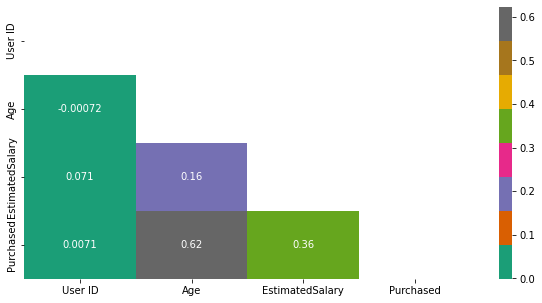

In [9]:
plt.figure(figsize=(10, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, annot=True, cmap='Dark2');

In [10]:
correlation = pd.DataFrame(df.corr().Purchased)
correlation

,Purchased
User ID,0.007120
Age,0.622454
EstimatedSalary,0.362083
Purchased,1.000000


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
The User ID column has no significance in determining the target, so it can be dropped.</p> </div>

In [11]:
df.drop('User ID', axis = 1, inplace=True)

<a id="6"></a> <br>
# 6. Analysis and Visualization of Target

In [12]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

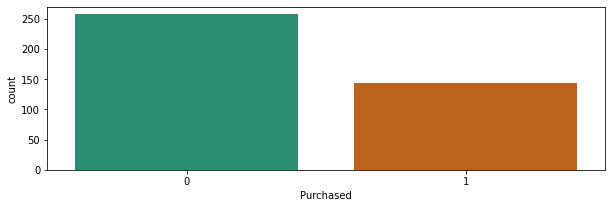

In [13]:
plt.figure(figsize=(10, 3))
sns.countplot(x = "Purchased",data=df, palette="Dark2")
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
From above visualization it is clear that number customers purchased from social networking advertisment is far less that total customers viewed the advertisement.  </p> </div>

## Visualization and statistical analysis of Target with respect to Gender

<Figure size 720x216 with 0 Axes>

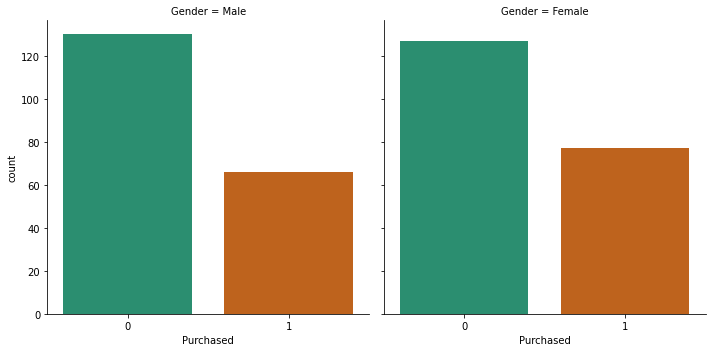

In [14]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Purchased', col='Gender', kind='count', data=df,palette="Dark2");
plt.show()

In [15]:
pd.crosstab(df.Gender,df.Purchased,normalize = "index" ).style.background_gradient(cmap='crest')

Purchased,0,1
Gender,,
Female,0.622549,0.377451
Male,0.663265,0.336735


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
37.74% of female customers have purchased a product from social networking advertisment where as only 33.67% of male customers purchased from social networking advertisment.    </p> </div>





## Distribution and Visualisation of Age and Estimated Salary

<AxesSubplot:xlabel='Age', ylabel='Count'>

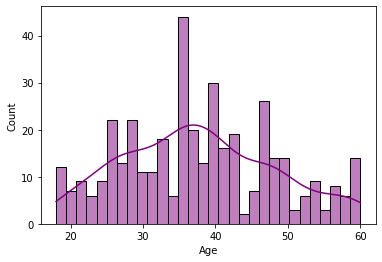

In [16]:
sns.histplot(df['Age'],kde=True,color='purple',bins=30)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

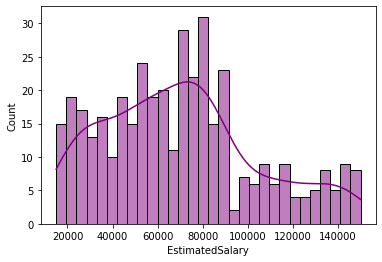

In [17]:
sns.histplot(df['EstimatedSalary'],kde=True,color='purple',bins=30)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Skew is towards age group 35-38 and estimated salary skew is towards 70k to 90k  </p> </div>





## Pair Plot of Age and Estimated Salary with Target

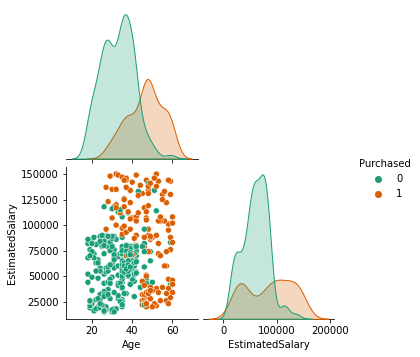

In [18]:
sns.pairplot(df , hue = 'Purchased',palette='Dark2',corner=True )

## Scatter Plot of Age and Estimated Salary with respect to Target

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

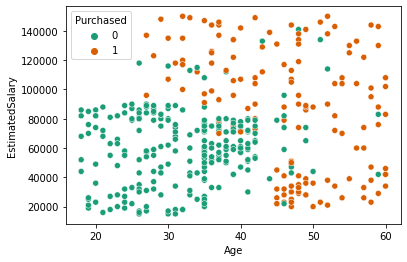

In [19]:
sns.scatterplot(x = 'Age',y = 'EstimatedSalary', data = df, hue = 'Purchased', palette ='Dark2')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
From pair plot and scatter plot it is clear that if scaling is not done, Estimated Salary will dominate Age, which will result in a biased model. Feature Scaling will be done after splitting the model into training and test set.  </p> </div>

<a id="7"></a> <br>
# 7. Encoding Categorical Data 

Column Gender contain categorical variables, it should be encoded before building the model.

For enoding categorical data, dummy variable is to be created for each discrete categorical variable in each column which can be done by using pandas.get_dummies() which will return dummy-coded data. By using drop_first we can drop first dummy variable.

In [20]:
df = pd.get_dummies(df, columns = ['Gender'], drop_first=True)

In [21]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


<a id="8"></a> <br>
# 8. Splitting Dataset

In [22]:
X = df.drop(['Purchased'],axis = 1)
y = df['Purchased']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<a id="9"></a> <br>
# 9. Feature Scaling

Feature Scaling is scaling all your features to make sure they all take values on the same scale. It prevents one feature to dominate over the other. Here if feature scaling is not done, then estimated salary will dominate age.

Feature Scaling is done after we split the dataset into the training set and test set and it is applied to the training set.

For feature scaling, we use the fit_transform() method for the training set and the transform() method for the test set.

fit_transform() : - It is applied only for training set. It contain two methods fit() and transform(). Fit() will do all the mathematical calculation and will get the mean and standard deviation of the data. So it is only done to training set, as we donot want test data values to be known by the model. As we consider test data as real data or live data. transform() method will apply the calculated values to the dataset or it transforms the data to fit the model.

transform() :- The transform() method applied to test set and test data are transformed or scaled using the model parameters that were learned on applying the fit method to the training dataset.

In [24]:
cols = X_train.columns

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

<a id="10"></a> <br>
# 10. K Nearest Neighbor(KNN)

K Nearest Neighbour (KNN) is a supervised learning algorithm used for classification or regression problems. It is more efficient for classification problems and here the algorithm uses K nearest points to determine the classification of a data point. KNN is used to classify a data point based on the known classification of other data points.

KNN works consider that similar things exist in close proximity or distance and there is no need to build a model, as it tunes several parameters, or makes additional assumptions. 
KNN is versatile but gets slower as the features increase.

In [26]:
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(X_train, y_train)

KNeighborsClassifier()

**“minkowski” here indicates MinkowskiDistance and it is calculated as sum ( | x - y | ^ p) ^( 1/p )**

In [27]:
y_pred = classifierKNN.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

<a id="10.1"></a> <br>
# 10.1 Evalution of KNN Classifier

## Confusion Matrix

In [28]:
cm1 = confusion_matrix(y_test,y_pred)
print(cm1)

[[64  4]
 [ 3 29]]


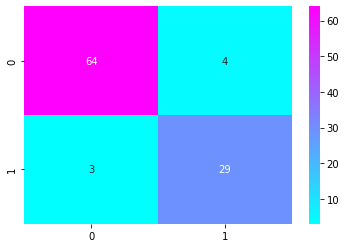

In [29]:
sns.heatmap(cm1, annot=True, fmt='d', cmap='cool')
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Out of 100, only 7 is wrongly predicted </p> </div>

## Classification Report

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Overall Accuracy is 93% and Precision, Recall and F1-score for predicting not purchased category is above 94% and for purchased category is close to 90%.</p> </div>

<a id="10.2"></a> <br>
# 10.2 Choosing a K Value

In KNN Choice of k is very critical. A small value of k means that noise will have a higher influence on the result. A large value makes it computationally expensive and is contradictory to the basic idea behind KNN, that close points might have similar densities or classes.The default parameter for the number of neighbors k is 5.


In [31]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

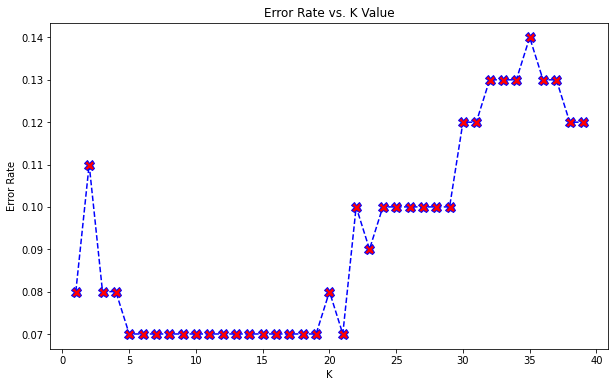

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='X',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">From the plot it is clear from K =5 to K =18 the error rate is lowest and K= 35 error rate is maximum.</p> </div>

WITH K=10


[[64  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100





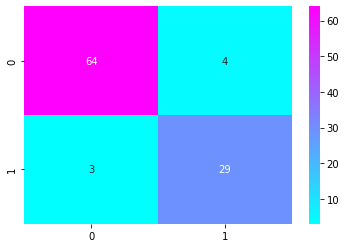

In [33]:
knn1 = KNeighborsClassifier(n_neighbors=10)

knn1.fit(X_train,y_train)
pred1 = knn1.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred1))
sns.heatmap(confusion_matrix(y_test,pred1), annot=True, fmt='d', cmap='cool')
print('\n')
print(classification_report(y_test,pred1))
print('\n')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
K =5 and K =10 is having the same accuracy, precision, recall, and F1- score. It is the same predicted from the plot of error rate vs K value that K with 5 to 10 will have same result.</p> </div>

WITH K=35


[[65  3]
 [11 21]]


              precision    recall  f1-score   support

           0       0.86      0.96      0.90        68
           1       0.88      0.66      0.75        32

    accuracy                           0.86       100
   macro avg       0.87      0.81      0.83       100
weighted avg       0.86      0.86      0.85       100





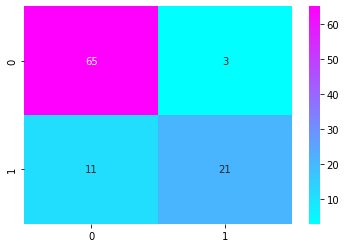

In [34]:
knn2 = KNeighborsClassifier(n_neighbors=35)

knn2.fit(X_train,y_train)
pred2 = knn2.predict(X_test)

print('WITH K=35')
print('\n')
print(confusion_matrix(y_test,pred2))
sns.heatmap(confusion_matrix(y_test,pred2), annot=True, fmt='d', cmap='cool')
print('\n')
print(classification_report(y_test,pred2))
print('\n')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
With K = 35, out of 100, 14 predictions are wrong and accuracy decreased to 86%. Also recall from purchased category has gone down to 66%. It clearly states if the K value is large, KNN does not perform efficiently.</p> </div>

<a id="13"></a> <br>
# 11. Support Vector Machine (SVM)

Support Vector Machine is a set of supervised learning methods and is used for classification, regression, and outliers detection. The main advantage of SVM is it is effective in high dimensional space even when the number of samples is less than the number of dimensions. But in cases where dimensions are more than the number of samples, overfitting is to be avoided.

The main goal of the SVM algorithm is to create the best line or decision boundary which is the hyperplane that can segregate n-dimensional space into classes so that it can put the new data point in the correct category in the future. 

Unlike other classifiers which pay attention to all of the points, Support vector machines focus only on the points that are the most difficult to classify.

<a id="11.1"></a> <br>
# 11.1 Hyperplane

A  hyperplane is a subspace whose dimension is one less than that of its ambient space or space surrounding the object. If space is

* 3-dimensional then its hyperplanes are the 2-dimensional planes.
* 2-dimensional, its hyperplanes are the 1-dimensional lines. 
* 1-dimensional, its hyperplane is a single point. 

Consider a two-class classification, where the label belongs to red and green as below and the two features are X1 and X2. Here if we have a lot of options to draw a hyperplane that separates the two classes. To choose the best one out of this is to choose the hyperplane and maximizes the margin between the classes.

The vector points which are on the margin are called **support vectors.**

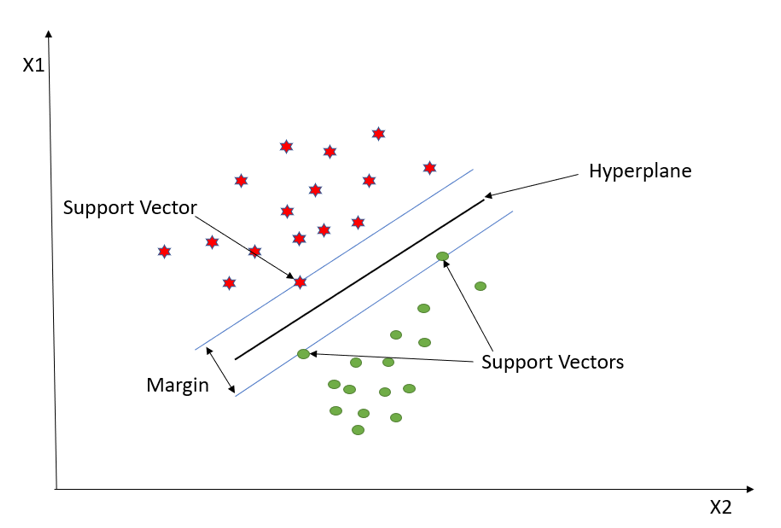

<a id="11.2"></a> <br>
# 11.2 SVM Kernel

SVM uses a set of mathematical functions known as kernel for creating a optimal decision boundary by taking data as input. The most preferred kind of kernel function is RBF. Because it's localized and has a finite response along the complete x-axis. 

If the data is too similar or is just difficult to separate for some reason or because it is nonlinear, then the SVM with the kernel can add another dimension with a "hyperplane" that can separate the data points.

Kernel must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable and **‘rbf’ is default.**

<a id="12"></a> <br>
# 12. SVM with Linear Kernel

This kernel best suites for classification problems where datas are linearly separated like text-classification problem.

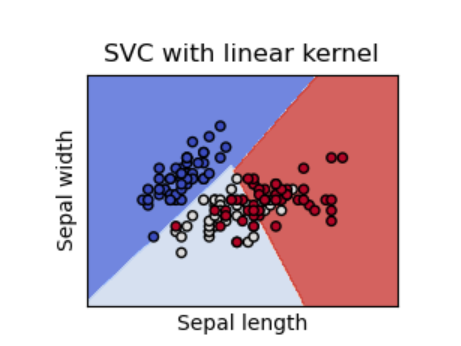

In [35]:
classifierLin = SVC(kernel = 'linear')
classifierLin.fit(X_train, y_train)

SVC(kernel='linear')

**Default value of gamma is scale and default value of C parameter is 1.**

In [36]:
classifierLin.gamma

'scale'

In [37]:
classifierLin.C

1.0

In [38]:
y_pred_svc = classifierLin.predict(X_test)

In [39]:
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

<a id="12.1"></a> <br>
# 12.1 Evalution of SVM with Linear Kernel

## Confusion Matrix

In [40]:
cm2 = confusion_matrix(y_test, y_pred_svc)
print(cm2)

[[66  2]
 [ 9 23]]


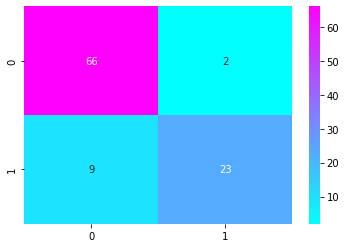

In [41]:
sns.heatmap(cm2, annot=True, fmt='d', cmap='cool')
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Out of 100, 11 are wrongly predicted.</p> </div>

## Classification Report

In [42]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        68
           1       0.92      0.72      0.81        32

    accuracy                           0.89       100
   macro avg       0.90      0.84      0.87       100
weighted avg       0.89      0.89      0.89       100



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Accuracy is 89% but recall for purchased is only 72%.</p></div>



<a id="13"></a> <br>
# 13. SVM with Kernel Radial Basis Function

The Kernel Radial Basis Function(RBF) function is defined as below and gamma should be greater than zero.

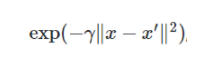

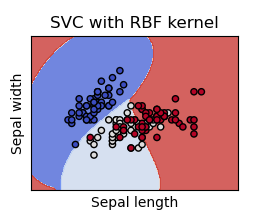

In [43]:
classifierrbf = SVC(kernel = 'rbf')
classifierrbf.fit(X_train, y_train)

SVC()

In [44]:
classifierrbf.C

1.0

In [45]:
classifierrbf.gamma

'scale'

In [46]:
y_pred_rbf = classifierrbf.predict(X_test)
y_pred_rbf

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

<a id="13.1"></a> <br>
# 13.1 Evalution of SVM with RBF Kernel

In [47]:
cm3 = confusion_matrix(y_test, y_pred_rbf)
print(cm3)

[[64  4]
 [ 3 29]]


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Out of 100, only 7 is wrongly predicted </p> </div>

In [48]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Overall Accuracy is 93% and Precision, Recall and F1-score for predicting not purchased category is above 94% and for purchased category is close to 90% </p> </div>

<a id="14"></a> <br>
# 14. HyperParameter Tuning

Hyperparameter optimization is a method of choosing a set of  optimal hyperparameters  for a learning algorithm. 
The machine learning model can have different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. The main difference between parameters and hyperparameters are, parameters are  learned automatically where as  hyperparameters value are set manually.

The result of a hyperparameter optimization is a single set of well-performing hyperparameters that you can  be configured to the model for best performance.	
To get well-performing hyperparameters there different search approarch like Grid Search, Random Search, Bayesian optimization, Gradient-based optimization, Evolutionary optimization, Population-based.


<a id="15"></a> <br>
# 15. GridSearch

Grid search is kind of tuning process,  which selects the best parameters for an algorithm to optimize its performance but it take quite long time to run. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
GridSearchCV implements a “fit” and a “score” method.


When training an SVM, two parameters must be considered:

* C 

* gamma

By using Grid search best optimal value for C and gamma as well as best Kernel for SVM can be found out.

## C Parameter

SVC Implementation is based on libsvm(library for Support Vector Machines). C is the Regularization parameter in SVC and its float with default value 1. The strength of the regularization is inversely proportional to C. It must be strictly positive.

C determines the trade-off between increasing the margin size and ensuring that the training points lie on the correct side of the margin. If the value of C is small it will create a larger-margin separating hyperplane without taken care it will misclassify more points leading to large training error. Whereas if the value of C is very large optimizer will choose a smaller-margin separating hyperplane which will classify training points correctly but can lead to overfitting.

Choosing value of C is critical in SVC and which can be done by hyperparameter tuning.

## gamma Parameter

The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors and it is Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.The default value of gamma is ‘scale’ and its value is  1 / (n_features * X.var()).

When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. But the higher value of gamma will exactly fit the training data points but will lead to overfitting. 

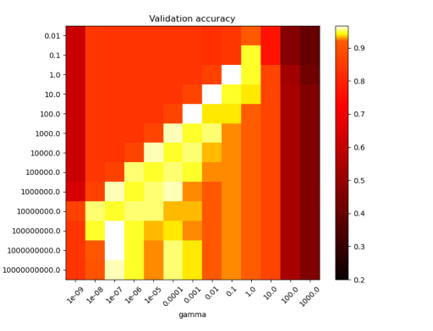

In [49]:
g =GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1,0.1,0.01,0.001,0.0001,1.1,1.2],'kernel': ('linear', 'rbf')})

In [50]:
g.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1.1, 1.2],
                         'kernel': ('linear', 'rbf')})

The Grid search gives a combination of values which have the highest accuracy among all the values. 

In [51]:
g.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Best Parameter for SVM is Kernel rbf with gamma =1 and C =1.</p> </div>


In [52]:
g.best_estimator_

SVC(C=1, gamma=1)

In [53]:
grid_pred = g.predict(X_test)

<a id="15.1"></a> <br>
# 15.1 Evalution with Grid Search

## Confusion Matrix

In [54]:
print(confusion_matrix(y_test,grid_pred))

[[64  4]
 [ 3 29]]


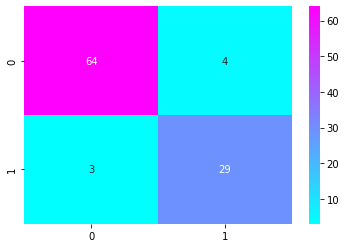

In [55]:
sns.heatmap(confusion_matrix(y_test,grid_pred), annot=True, fmt='d', cmap='cool')
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Out of 100, only 7 is wrongly predicted </p> </div>


## Classification Report

In [56]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Overall Accuracy is 93% and Precision, Recall and F1-score for predicting not purchased category is above 94% and for purchased category is close to 90% </p> </div>

<a id="16"></a> <br>
# 16. Conclusion

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#0142A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    
 <li style="padding-left:1em">Number customers purchased through social networking advertisment is far less that total customers viewed the advertisement.</li>

<li style="padding-left:1em">37.74% of female customers have purchased a product through social networking advertisment where as only 33.67% of male customers purchased through social networking advertisment.</li>

<li style="padding-left:1em">For KNN, K =5 to K =18 have least error rate and K= 35 has maximum error rate.</li>
    
<li style="padding-left:1em">Best Parameter for SVM is Kernel rbf with gamma =1 and C =1.</li>

<li style="padding-left:1em">KNN with least error rate and SVM with best optimisation parameter have overall:</li>
    <li style="padding-left:1em">Accuracy 93% </li>
    <li style="padding-left:1em">Precision, Recall and F1-score for predicting not purchased category is above 94%  </li>
    <li style="padding-left:1em">Precision, Recall and F1-score for predicting purchased category is close to 90%.</li></p> </div>




<a id="16"></a> <br>
# 17. Reference

https://www.robots.ox.ac.uk/~cvrg/bennett00duality.pdf

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
